# <b>Group 9 Project Report - An Analysis of University Exam Performance Factors</b>

## Introduction:

There are many factors that can be attributed to high exam performance in university-level courses; variables such as study time, knowledge level, and performance on exams in related subjects can each help determine the eventual exam performance on goal subjects (Walck-Shannon et al., 2021, Kahraman et al., 2013). A student’s performance on an exam is very complex and is dependent on a multitude of factors, which leads to it being very difficult to predict <b>(Figure 1)</b>. A basic visualization of the data suggests that knowledge level plays a role in determining how well a student may perform on an exam <b>(Figure 1)</b>, however, study time and related exam performance can further contribute to high scores. 

Seeing how these variables affect performance begs the question: <b>Can students’ exam scores be accurately predicted based solely on knowledge level, study time, and performance in related exams, and if so, which predictors result in the highest accuracy?</b>

This project aims to answer this question by constructing and comparing 2 KNN regressions based on the dataset, <i>User Knowledge Modeling Data Set</i> (Kahraman et al., 2013), which recorded exam performance of students in the subject of Electrical DC Machines and can be found on the UCL Machine Learning Repository. The regressions differ in predictor - the first using study time and the second using related exam performance. This is to determine if one of these factors is a stronger predictor than the other. This data set contains data that was previously standardized and tidied. The authors were also split the data into a training and testing sets which will be used for the construction of both models. This project will calculate the best K-value for our regression, find its RMSPE value, and  discuss the results.

## Methods & Results:

The first step in the analysis of the data was downloading the excel file from the online database into Jupyter, and establishing a training and testing dataset. The data was already separated into training and testing datasets. Once downloaded, the table headers were changed into a more readable format and columns of interest (study_time, knowledge_level, exam_performance_related, exam_performance_goal) were selected <b>(Tables 1 & 2)</b>. 

To perform a regression, all predictors are required to be numeric. However, one of the predictors (knowledge level) was stored as characters. To circumvent this issue, an additional column was added to both the training and testing data assigning the numbers 1 through 4 to their respective category of knowledge level (starting with 1 as "very_low", through to 4 as "high").

The training data was grouped by knowledge level and summarized with the average of all the variables (predictor and response) calculated. The number of observations in each category demonstrated that the number of observations in the "Low" to "High" knowledge levels were similar, however, there were significantly fewer data points in the "Very Low" category <b>(Table 3)</b>.

A KNN regression was chosen over other models as the data forms 4 distinct clusters based on knowledge level <b>(Figure 1)</b> and there is a lack of a discernable linear relationship between predictors and response variables. Each cluster showed a slight negative relationship between study time/related exam performance and target exam performance.

The next step in the analysis was to determine how many neighbors should be used for each model. To address this, a 5-fold cross-validation testing up to 20 neighbors was performed using the training data. It is important to note that the data appeared to have been previously standardized, as such, this step was not included in the recipe. Different workflows were constructed using two different recipes (exam_performance_goal ~ knowledge_level + study_time|exam_performance_related respectively) <b>(Table 4)</b>. Once the workflow was generated, the results were arranged and sliced to display the observation with the smallest RMSE, and further plotted to confirm the output. <b>With respect to exam_performance_related, the smallest RMSPE appeared at k = 11. With respect to study_time, the smallst RMSPE appeared at k = 7 (Figure 2)</b>.

Specifications for both the study time and related exam performance model were generated using the derived k-values. The fitted models were then used to predict the testing data with the results summarized in <b>Table 5</b>. The predictions were further used to calculate the RMSPE for each model. The <b>related exam performance model yielded an RMSPE of 0.07982301</b>, whereas the <b>study time model yielded an RMSPE of 0.1084437 (Table 6)</b>.

Lastly, predictions for both models were plotted alongside the testing data points and separated by based on knowledge level <b>(Figures 3 & 4)</b>. Separating each knowledge level allowed for easier comparisons between the study time and related exam performance models. The testing data points were plotted and colored based on  knowledge level, and the models were plotted using a solid blue line.


In [21]:
# run this:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(readxl)
library(RColorBrewer)
library(cowplot)

In [22]:
# table viewing options, can change according to reader preferences
options(repr.matrix.max.rows = 6)

## <i>Table Legend:</i>
<b>Table 1:</b> Training Data 
<br><b>Table 2:</b> Testing Data
<br><b>Table 3:</b> Training Data Summary
<br><b>Table 4:</b> Related Exam Performance Model KNN Calculation
<br><b>Table 5:</b> Study Time Model KNN Calculation
<br><b>Table 6:</b> Related Exam Performance Model Workflow & Predictions on Testing Data
<br><b>Table 7:</b> Study Time Model Workflow & Predictions on Testing Data
<br><b>Table 8:</b> Related Exam Performance Model Accuracy Calculation
<br><b>Table 9:</b> Study Time Model Accuracy Calculation

## <i>Figure Legend:</i>
<b>Figure 1:</b> Exploratory Scatterplot of Predictor Variables
<br><b>Figure 2:</b> RMSPE of Training Models
<br><b>Figure 3:</b> Predictions vs. Data of Exam Performance (With Respect to Related Exam Performance)
<br><b>Figure 4:</b> Predictions vs. Data of Goal Exam Performance (With Respect to Study Time)

#### <b>Table 1: Training Data</b> 

In [23]:
download.file(destfile = "user_knowledge.xls", 
              url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls")

user_training <- read_excel("user_knowledge.xls", sheet = 2) %>%
            select(STG, LPR, PEG, UNS) %>%
            rename(study_time_goal = STG,
                  exam_performance_related = LPR,
                  exam_performance_goal = PEG,
                  knowledge_level = UNS) %>%
            mutate(knowledge_level_numeric = recode(knowledge_level, very_low = '1', Low = '2', Middle =  '3', High = '4' )) %>%
            mutate(knowledge_level_numeric = as.numeric(knowledge_level_numeric))

user_training

New names:
* `` -> ...7
* `` -> ...8



study_time_goal,exam_performance_related,exam_performance_goal,knowledge_level,knowledge_level_numeric
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0.00,0.00,0.00,very_low,1
0.08,0.24,0.90,High,4
0.06,0.25,0.33,Low,2
⋮,⋮,⋮,⋮,⋮
0.54,0.29,0.77,High,4
0.50,0.61,0.26,Middle,3
0.66,0.87,0.74,High,4


#### <b>Table 2: Testing Data</b>

In [24]:
user_testing <- read_excel("user_knowledge.xls", sheet = 3) %>%
            select(STG, LPR, PEG, UNS) %>%
            rename(study_time_goal = STG,
                  exam_performance_related = LPR,
                  exam_performance_goal = PEG,
                  knowledge_level = UNS) %>%
            mutate(knowledge_level_numeric = recode(knowledge_level, 'Very Low' = '1', Low = '2', Middle =  '3', High = '4' )) %>%
            mutate(knowledge_level_numeric = as.numeric(knowledge_level_numeric))

user_testing

New names:
* `` -> ...7
* `` -> ...8



study_time_goal,exam_performance_related,exam_performance_goal,knowledge_level,knowledge_level_numeric
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0.00,0.26,0.05,Very Low,1
0.05,0.60,0.14,Low,2
0.08,0.60,0.85,High,4
⋮,⋮,⋮,⋮,⋮
0.56,0.13,0.32,Low,2
0.66,0.57,0.57,Middle,3
0.68,0.97,0.24,Middle,3


#### <b>Table 3: Training Data Summary</b>

In [25]:
study_data <- user_training %>%
        group_by(knowledge_level) %>%
        summarize(avg_exam_perf_goal = mean(exam_performance_goal),
                  avg_exam_perf_rel = mean(exam_performance_related),
                 avg_study_time = mean(study_time_goal),
                 number_of_observations = n()) %>%
        arrange(desc(avg_exam_perf_goal))

study_data

`summarise()` ungrouping output (override with `.groups` argument)



knowledge_level,avg_exam_perf_goal,avg_exam_perf_rel,avg_study_time,number_of_observations
<chr>,<dbl>,<dbl>,<dbl>,<int>
High,0.77253968,0.5012698,0.4216508,63
Middle,0.54238636,0.3428409,0.3999773,88
Low,0.23762651,0.4973494,0.3211446,83
very_low,0.09083333,0.3587500,0.3057917,24


#### <b>Table 4: Related Exam Performance Model KNN Calculations</b>

In [26]:
set.seed(2357)

# data already standardized
knowledge_recipe_related <- recipe(exam_performance_goal ~ exam_performance_related + knowledge_level_numeric, 
                          data = user_training) 

training_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                set_engine("kknn") %>%
                set_mode("regression")

training_vfold <- vfold_cv(user_training, v = 5, strata = exam_performance_goal)
neighbors <- tibble(neighbors = 1:20)

training_fit_related <- workflow() %>%
                add_recipe(knowledge_recipe_related) %>%
                add_model(training_spec) %>%
                tune_grid(resamples = training_vfold, grid = neighbors) %>%
                collect_metrics() %>%
                filter(.metric == "rmse")

training_results_related <- training_fit_related %>%
                    arrange(mean) %>%
                    slice(1)
print("Related Exam Scores")
training_results_related

[1] "Related Exam Scores"


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,rmse,standard,0.06050018,5,0.003440064,Model11


#### <b>Table 5: Study Time Model KNN Calculations</b>

In [27]:
set.seed(2357)

# data already standardized
knowledge_recipe_study <- recipe(exam_performance_goal ~ study_time_goal + knowledge_level_numeric, 
                          data = user_training) 

training_fit_study <- workflow() %>%
                add_recipe(knowledge_recipe_study) %>%
                add_model(training_spec) %>%
                tune_grid(resamples = training_vfold, grid = neighbors) %>%
                collect_metrics() %>%
                filter(.metric == "rmse")

training_results_study <- training_fit_study %>%
                    arrange(mean) %>%
                    slice(1)
print("Study Time")
training_results_study

[1] "Study Time"


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,rmse,standard,0.1050903,5,0.009090672,Model07


#### <b>Table 6: Related Exam Performance Model Workflow & Predictions on Testing Data</b>

In [28]:
# Related Exam Score Workflow

knowledge_spec_related <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) %>%
                set_engine("kknn") %>%
                set_mode("regression")

knowledge_fit_related <- workflow() %>%
                add_recipe(knowledge_recipe_related) %>%
                add_model(knowledge_spec_related) %>%
                fit(user_training)

knowledge_prediction_related <- predict(knowledge_fit_related, user_testing) %>%
                    bind_cols(user_testing)
print("Related Exam Scores")
knowledge_prediction_related

[1] "Related Exam Scores"


.pred,study_time_goal,exam_performance_related,exam_performance_goal,knowledge_level,knowledge_level_numeric
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0.09727273,0.00,0.26,0.05,Very Low,1
0.19181818,0.05,0.60,0.14,Low,2
0.78909091,0.08,0.60,0.85,High,4
⋮,⋮,⋮,⋮,⋮,⋮
0.3075455,0.56,0.13,0.32,Low,2
0.4054545,0.66,0.57,0.57,Middle,3
0.3236364,0.68,0.97,0.24,Middle,3


#### <b>Table 7: Study Time Model Workflow & Predictions on Testing Data</b>

In [29]:
# Study Workflow

knowledge_spec_study <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) %>%
                set_engine("kknn") %>%
                set_mode("regression")

knowledge_fit_study <- workflow() %>%
                add_recipe(knowledge_recipe_study) %>%
                add_model(knowledge_spec_study) %>%
                fit(user_training)

knowledge_prediction_study <- predict(knowledge_fit_study, user_testing) %>%
                    bind_cols(user_testing)

print("Study Time")
knowledge_prediction_study

[1] "Study Time"


.pred,study_time_goal,exam_performance_related,exam_performance_goal,knowledge_level,knowledge_level_numeric
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0.04285714,0.00,0.26,0.05,Very Low,1
0.25142857,0.05,0.60,0.14,Low,2
0.79857143,0.08,0.60,0.85,High,4
⋮,⋮,⋮,⋮,⋮,⋮
0.2700000,0.56,0.13,0.32,Low,2
0.5557143,0.66,0.57,0.57,Middle,3
0.5928571,0.68,0.97,0.24,Middle,3


#### <b>Table 8: Related Exam Performance Model Accuracy Calculation</b>

In [30]:
# With respect to Related Exam Scores

knowledge_results_related <- knowledge_prediction_related %>%
                    metrics(truth = exam_performance_goal, estimate = .pred) %>%
                    filter(.metric == "rmse")

print("Related Exam Scores")
knowledge_results_related

[1] "Related Exam Scores"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.07982301


#### <b>Table 9: Study Time Model Accuracy Calculation</b>

In [31]:
# With respect to Study time

knowledge_results_study <- knowledge_prediction_study %>%
                    metrics(truth = exam_performance_goal, estimate = .pred) %>%
                    filter(.metric == "rmse")

print("Study Time")
knowledge_results_study

[1] "Study Time"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.1084437


#### <b>Figure 1: Exploratory Scatterplot of Predictor Variables

In [32]:
exam_plot_study <- user_training %>%
            ggplot(aes(x = study_time_goal, y = exam_performance_goal)) +
            geom_point(aes(color = knowledge_level)) +
            labs(x = "Study Time", y = "Exam Performance", color = ("Knowledge Level")) +
            ggtitle("Target Exam Performance vs. Study Time") +
            theme(text = element_text(size = 15)) +
            theme(plot.title = element_text(hjust = 0.5))

exam_plot_related <- user_training %>%
            ggplot(aes(x = exam_performance_related, y = exam_performance_goal)) +
            geom_point(aes(color = knowledge_level)) +
            labs(x = "Exam Performance (related)", y = "Exam Performance (target)", color = ("Knowledge Level")) +
            ggtitle("Target Exam Performance vs. Related Exam Perfomance") +
            theme(text = element_text(size = 15)) +
            theme(plot.title = element_text(hjust = 0.5))

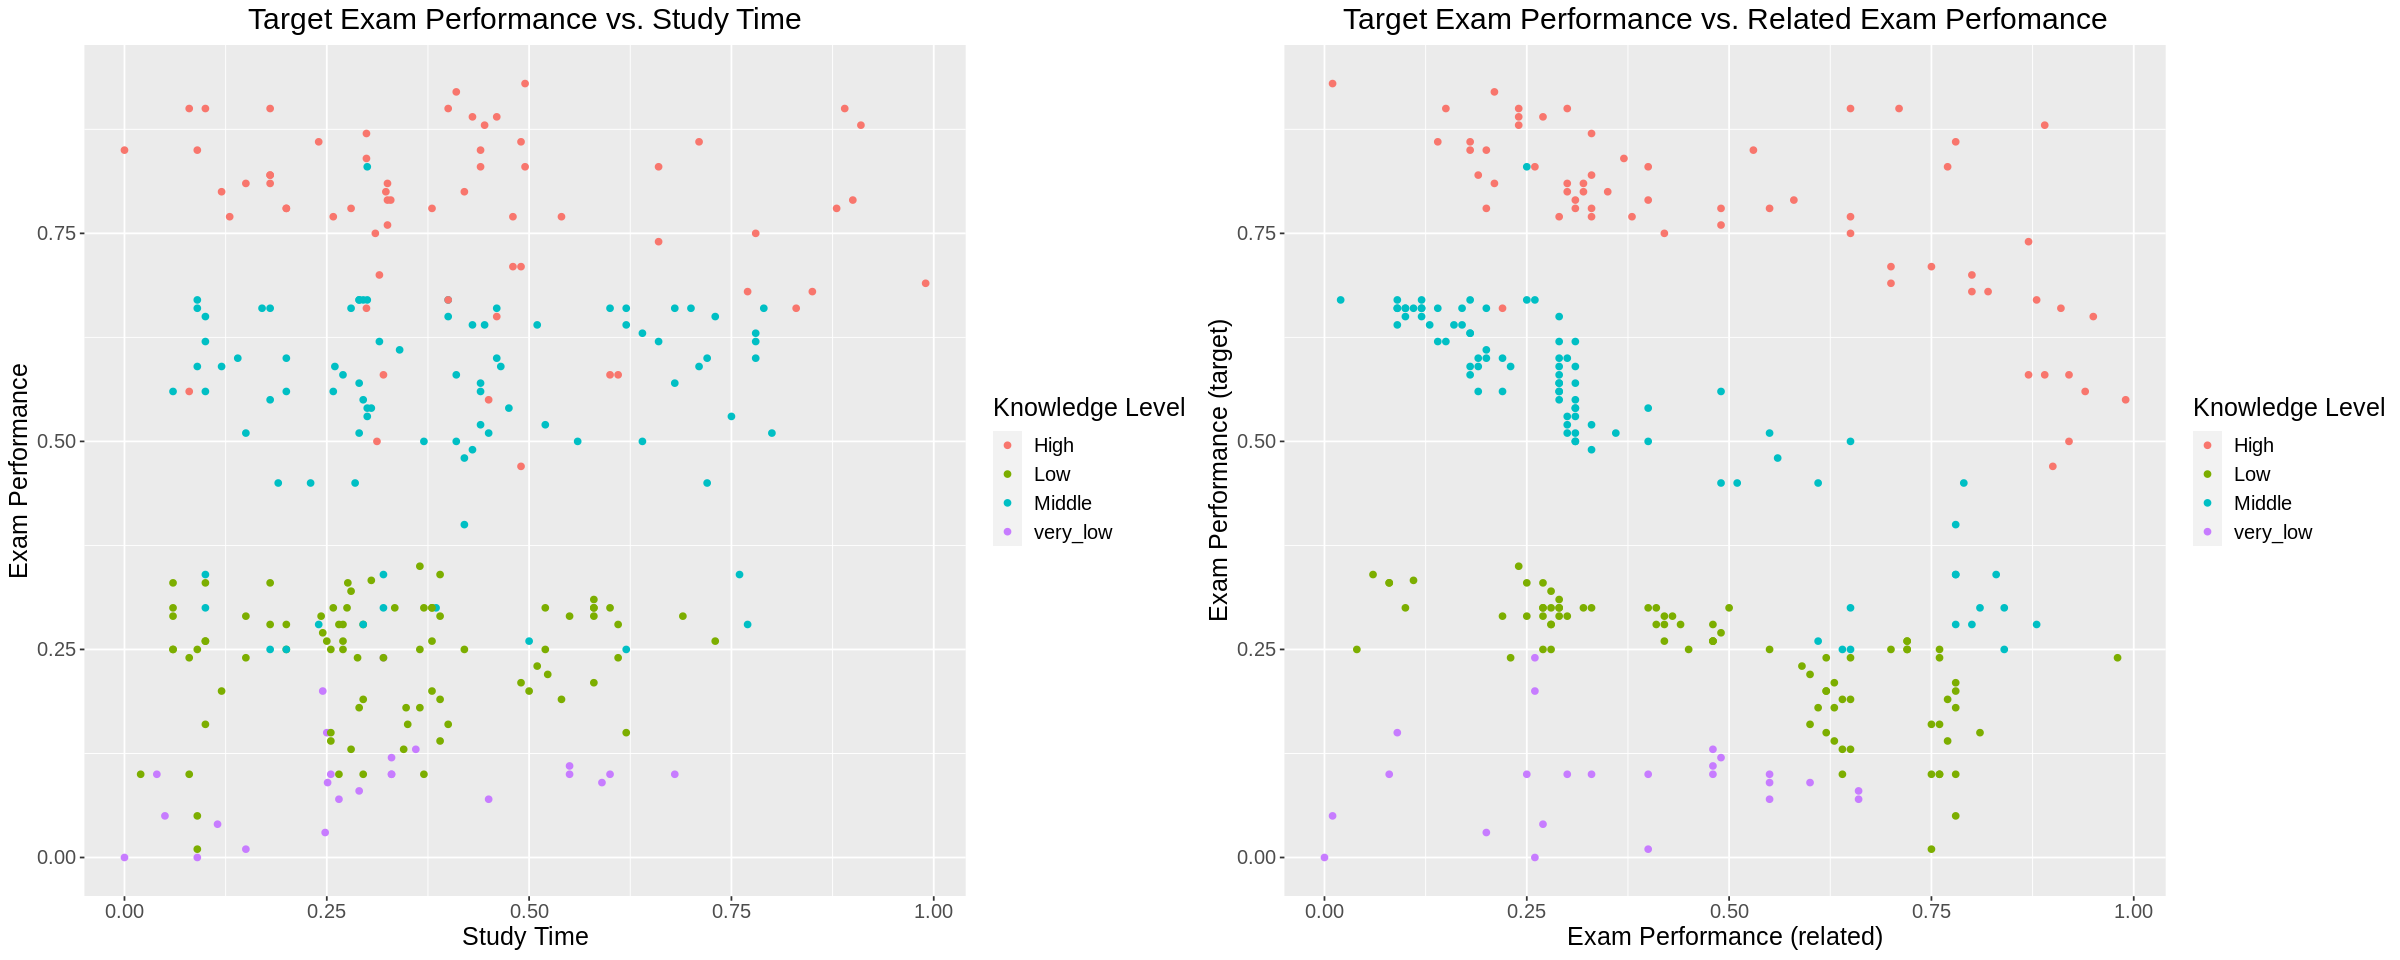

In [33]:
options(repr.plot.width = 20, repr.plot.height = 8)
panel <- plot_grid(exam_plot_study, exam_plot_related)
panel

#### <b>Figure 2: RMSPE of Training Models

In [34]:
options(repr.plot.width = 7, repr.plot.height = 5)
training_plot_related <- training_fit_related %>%
                ggplot(aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors", y = "RMSPE") +
                ggtitle("RMSPE vs. Number of Neighbors (Related Exam Scores)") +
                theme(text = element_text(size = 13)) +
                theme(plot.title = element_text(hjust = 0.5))
training_plot_study <- training_fit_study %>%
                ggplot(aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors", y = "RMSPE") +
                ggtitle("RMSPE vs. Number of Neighbors (Study Time)") +
                theme(text = element_text(size = 13)) +
                theme(plot.title = element_text(hjust = 0.5))

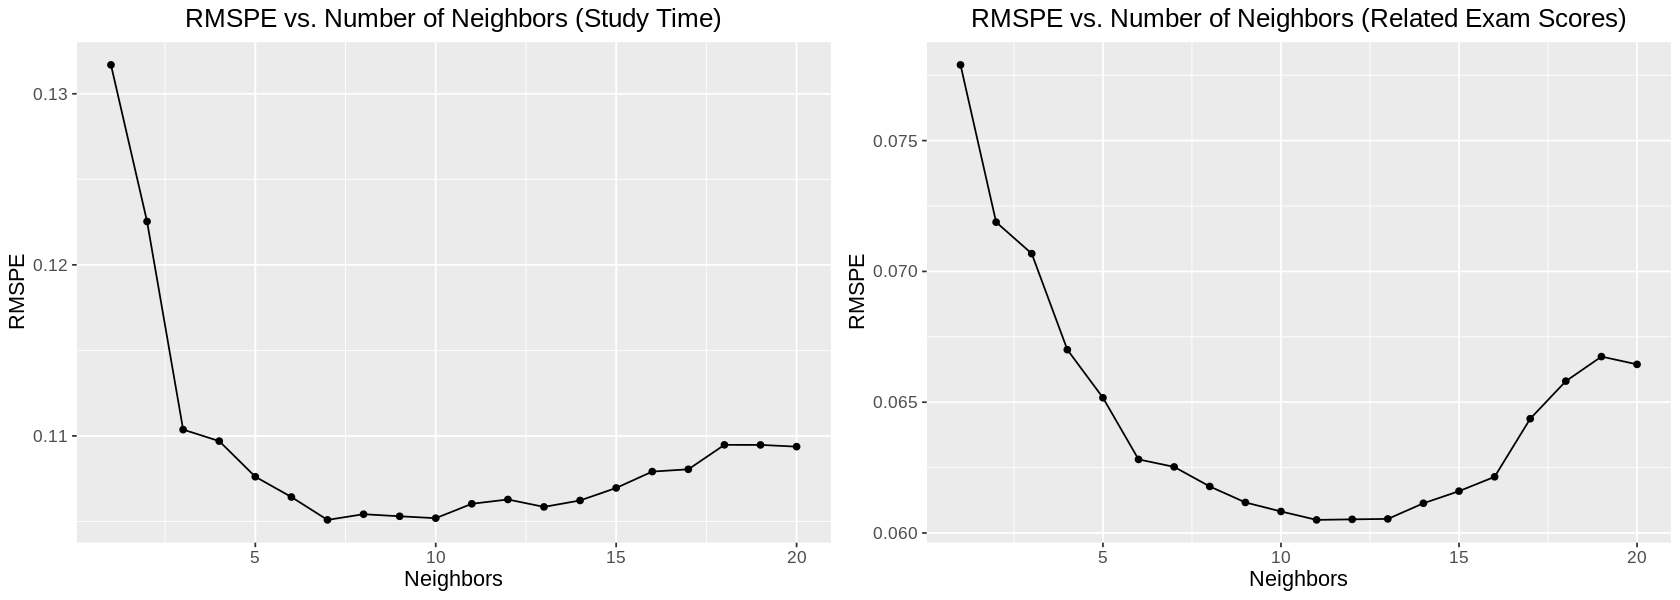

In [35]:
options(repr.plot.width = 14, repr.plot.height = 5)
panel2 <- plot_grid(training_plot_study, training_plot_related)
panel2

#### <b>Figure 3: Predictions vs. Data of Goal Exam Performance (With Respect to Related Exam Performance)

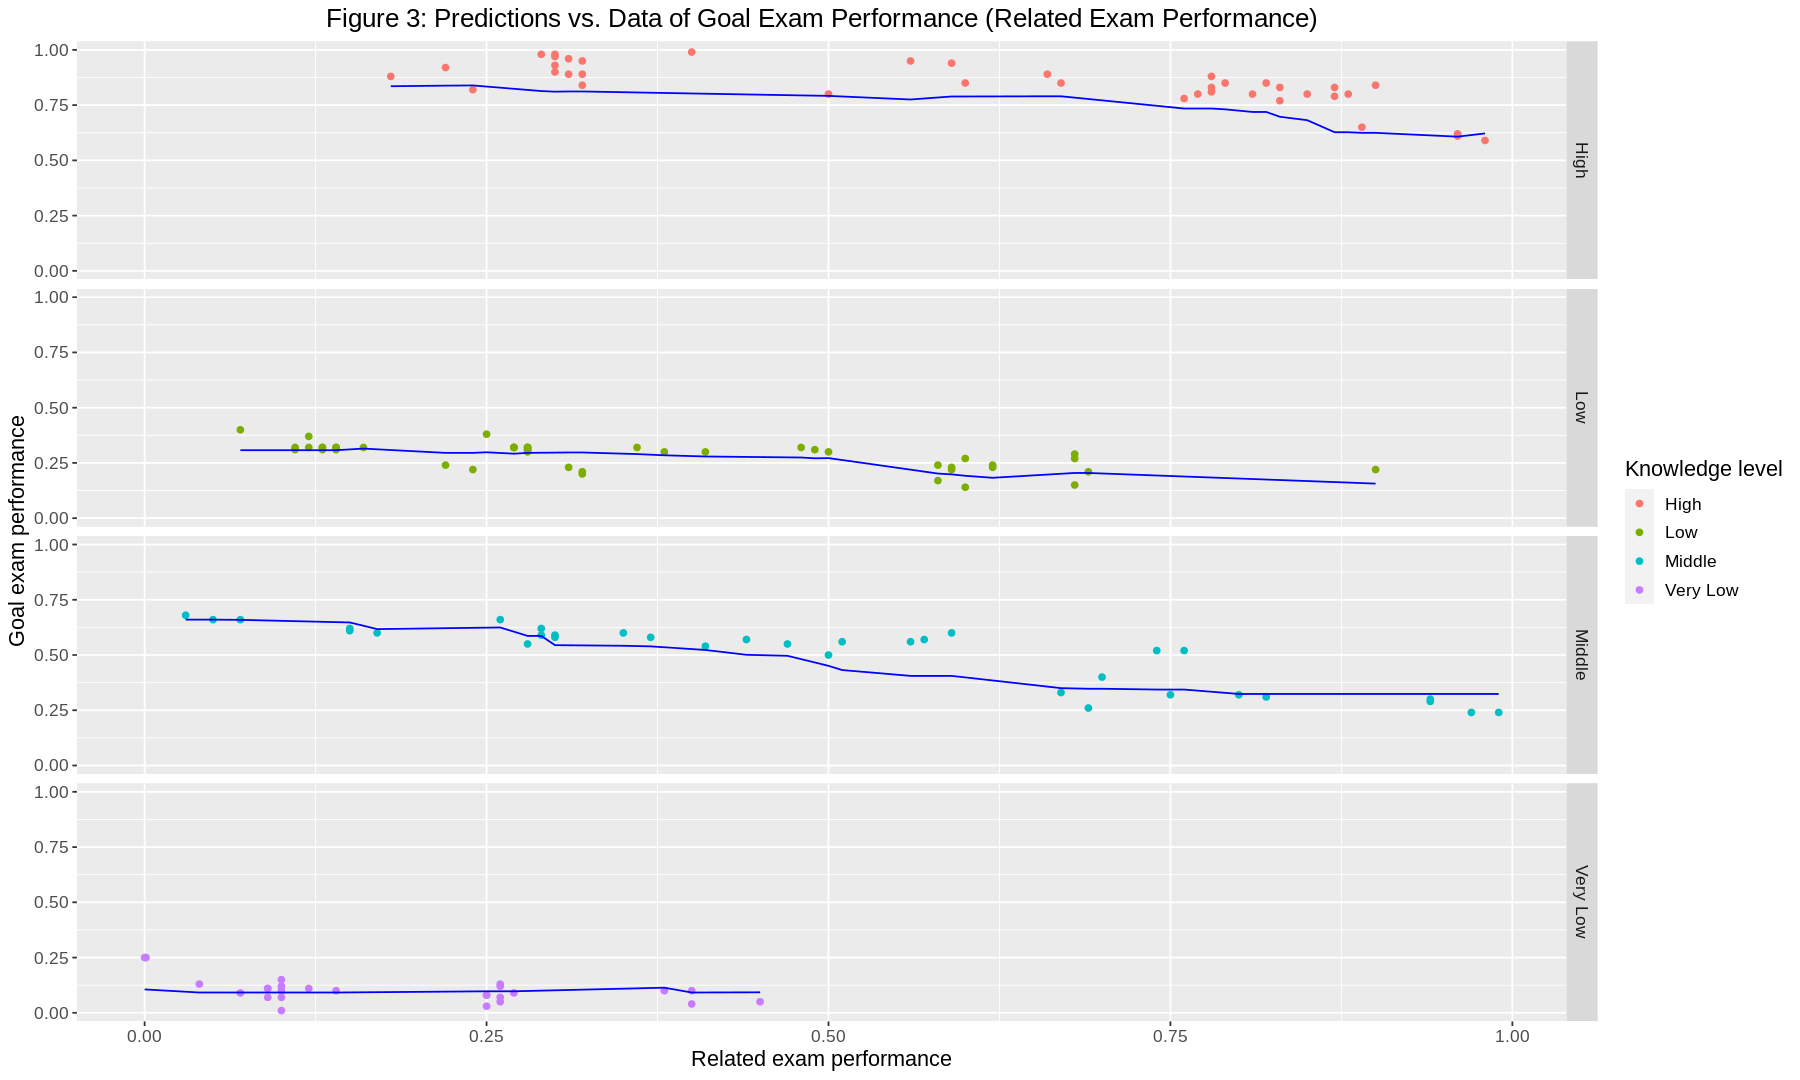

In [36]:
options(repr.plot.width = 15, repr.plot.height = 9)
exam_plot <- user_testing %>%
            ggplot(aes(x = exam_performance_related, y = exam_performance_goal)) +
            geom_point(aes(color = knowledge_level)) +
            geom_line(data = knowledge_prediction_related,
                     mapping = aes(x = exam_performance_related, y = .pred),
                     color = "blue") +
            facet_grid(rows = vars(knowledge_level)) +
            labs(x = "Related exam performance", y = "Goal exam performance", color = "Knowledge level") +
            ggtitle("Figure 3: Predictions vs. Data of Goal Exam Performance (Related Exam Performance)") +
            theme(text = element_text(size = 13)) +
            theme(plot.title = element_text(hjust = 0.5))
exam_plot

#### <b>Figure 4: Predictions vs. Data of Exam Performance (With Respect to Study Time)

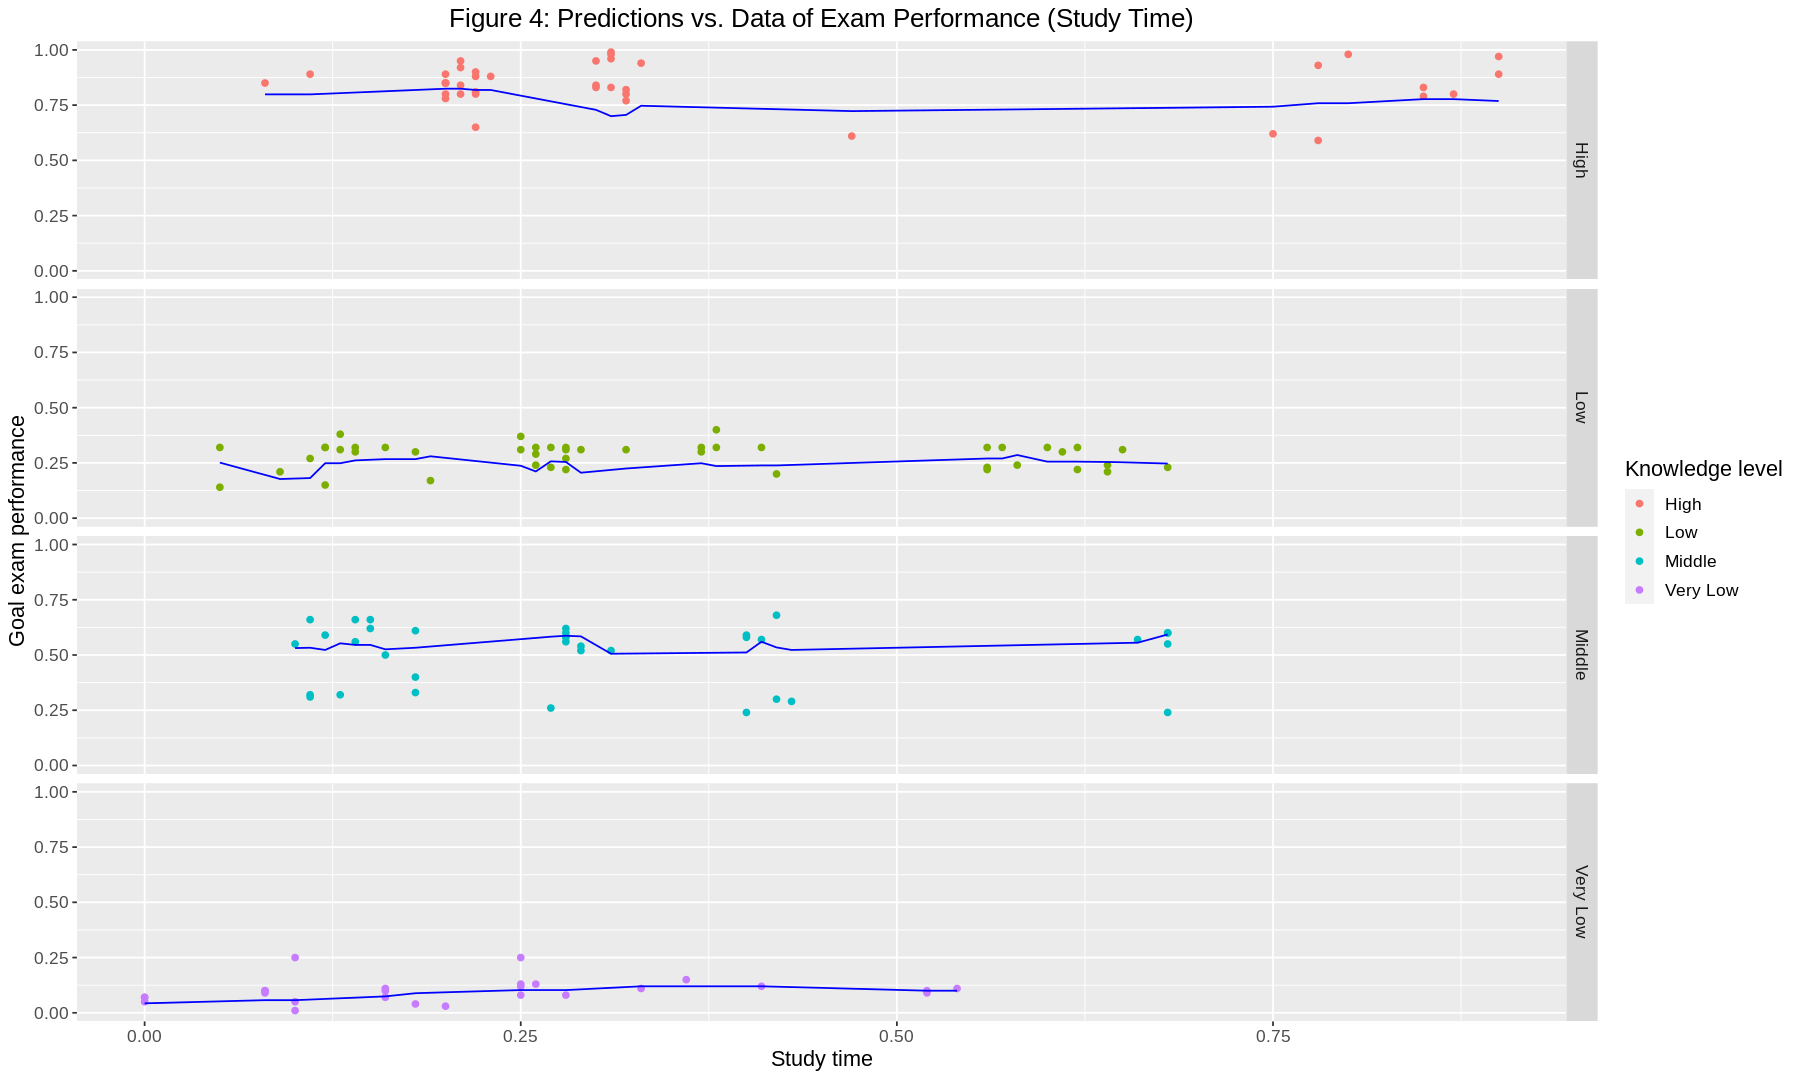

In [37]:
options(repr.plot.width = 15, repr.plot.height = 9)
study_plot <- user_testing %>%
            ggplot(aes(x = study_time_goal, y = exam_performance_goal)) +
            geom_point(aes(color = knowledge_level)) +
            geom_line(data = knowledge_prediction_study,
                     mapping = aes(x = study_time_goal, y = .pred),
                     color = "blue") +
            facet_grid(rows = vars(knowledge_level)) +
            labs(x = "Study time", y = "Goal exam performance", color = "Knowledge level") +
            ggtitle("Figure 4: Predictions vs. Data of Exam Performance (Study Time)") +
            theme(text = element_text(size = 13)) +
            theme(plot.title = element_text(hjust = 0.5))
study_plot

## Discussion:

Our group’s aim was to predict the exam performance of students through the  development of a KNN regression model. We were expecting that we would be able to do this by looking at different factors, including study time, related exam performance, and knowledge level as predictors of target exam performance. These predictors were selected as a way to factor in a student's baseline knowledge (related exam performance, knowledge level) and studying to improve knowledge (study time).

#### <b> Goal Exam Performance and Related Exam Performance Model</b>
A quick glance at the model <b>(Figure 3)</b> shows a slight negative relationship between exam performance and related exam performance within each knowledge level. This could be explained by one not studying as much for a future exam if they have gotten a high mark for a related exam, or due to overconfidence taking an exam. Thus, we can conclude that a high score in related exam performance does not guarantee that one will perform better on an exam. However, we can see that the results differ greatly based on knowledge level. High knowledge level individuals score higher. Middle and low knowledge level individuals score in a similar range and very low score level individuals score lower. 

<b>Our prediction line also appears to be more accurate for this model than the Study Time model, as the RMSPE for Related Exam Performance is 0.08 compared to 0.1 for Study Time</b>. Additionally, this model shows an increased accuracy in predicting exam performance at very low to medium knowledge levels, as shown by the data points appearing closer to the model line.

#### <b> Goal Exam Performance and Study Time Model</b>
A quick glance at the model <b>(Figure 4)</b> shows that there's no clear linear relationship between exam performance and study time (when looking at the graph as a whole; not subdivided). Increasing study time does not guarantee that one will perform better on a future exam. However, we can obseerve that knowledge level has an effect on exam performance. Those who possess a higher knowledge level generally perform better than those with a middle, low, or very low level. The actual data points also show that those with greater knowledge levels also study for the longest times. This is evident based on domain of each model; it is longer for the individuals with a “High” knowledge level and shorter for the “Very Low” knowledge level. The middle and low knowledge levels end at a similar study time. 

<b>Our prediction line also appears to be less accurate for this model than for the Related Exam Performance model, as the RMSPE for Study Time is 0.1 as compared to 0.08 for Related Exam Performance.</b>

#### <b> Conclusion & Future Areas of Investigation</b>
While our initial scatterplots indicated that neither of the numerical factors had a clear relationship with exam performance, our summary table suggested that average study time, when grouped by knowledge level, followed a similar trend as the average exam performance. As such, we expected that study time would be a stronger predictor of goal exam performance than related exam performance. The RMSPE calculations revealed that the combination of knowledge level and related exam performance yielded a more accurate result than the study time model. 

This agrees with our initial assumption that an individual with a higher knowledge level results in higher exam performance. However, as shown in <b>Figure 4</b>, study time in fact does not have a postive relationship with exam performance in contrast to our intial predictions. Knowledge level is the key factor in determining whether an individual will perform well or not; longer study time does not necessarily lead to an increased exam performance. 

It may be possible that studying technique has a stronger effect on exam performance than study length. Therefore, our findings make it clear that it is important and worthwhile to help individuals improve their study habits.  Working to improve study habits may be able to help those individuals with lower knowledge levels increase their confidence and competence in regards to their education. 

Furthermore, it was expected that study time would be a better indicator of goal exam performance than related exam performance. However, it became clear that related exam performance was actually a better predictor in this case, with both a lower RMSPE and a model that more closely resembled the data. Future research should investigate this relationship, as well as the slight negative relationship between the related and goal exam performance within each knowledge level.  

As it was demonstrated, related exam performance and knowledge level can act as a predictor for goal exam performance. This model could potentially be used to identify students that may be struggling in classes due to its relative accuracy when predicting exam performance at lower knowledge levels. This would allow students to access the support that they may need. 

## References:

1. Walck-Shannon, E. M., Rowell, S. F., & Frey, R. F. (2021). To What Extent Do Study Habits Relate to Performance?. <i>CBE—Life Sciences Education, 20(1)</i>, ar6.

2. Kahraman et al., (2013). UCI Machine Learning Repository: User knowledge modeling data set. Retrieved June 23, 2022, from https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling 